# ITS307 Data Analytics : Spring Semester 2022
# Assignment 3 [20 Marks]

# Supervised Learning: Classification

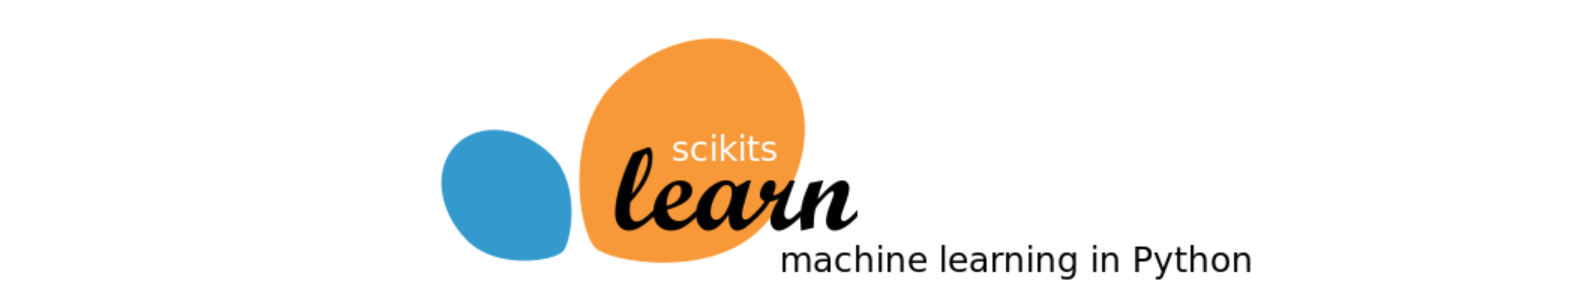

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Importing Libraries </li>
<li> Loading and Cleaning with Pandas</li>
<li> Handling Missing values</li>

<li> Scaling Numerical Features  </li>
<li> Encode Categorical Features  </li>
<li> Training Model</li>
<li> Evaluating Model</li>
<li> Making Prediction</li>
</ol>

# 0. Learning Objectives

For the purpose of this test, we will use the Credit Card Approval dataset from the UCI Machine Learning Repository. Dataset has mixture of both numerical and categorical features with number of missing entries. The features of this dataset have been anonymized to protect the privacy, but some blog gives pretty good overview of the probable features. The probable features in a typical credit card application are `Gender, Age, Debt, Married, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, PriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income` and finally the `ApprovalStatus`. For your understanding map the features descriptions given here with respect to columns in the dataset.

Feature Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z, dd, ff, o.
    A8:	continuous.
    A9:	t, f.
    A10:	t, f.
    A11:	continuous.
    A12:	t, f.
    A13:	g, p, s.
    A14:	continuous.
    A15:	continuous.
    A16: +,-         (class attribute)
    
  #### By the end of this test, you should be able to predict whether an applicant will be getting credit card approval or not.

# 1. Importing Libraries 

Import all the necessary libraries here. If you don't remember all the libraries in this step, you may choose to import when required.

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [39]:
df = pd.read_csv('creditcard.txt', sep='/t')

<ipython-input-39-47bada152ae5>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('creditcard.txt', sep='/t')


# 2. Loading and Cleaning Data with Pandas [3 M]


##  2.1.  Load data
- To load data, mention feature names given above in section 1 and display first five and last five records.

In [40]:
df = pd.read_csv('creditcard.txt', names=['Gender', 'Age', 'Debt','Married','BankCustomer','EducationLevel','Ethnicity','YearsEmployed','PriorDefault','Employed', 'CreditScore', 'DriversLicense','Citizen','ZipCode', 'Income','ApprovalStatus'])
df.head()

Gender    Age   Debt Married BankCustomer EducationLevel Ethnicity  \
0      b  30.83  0.000       u            g              w         v   
1      a  58.67  4.460       u            g              q         h   
2      a  24.50  0.500       u            g              q         h   
3      b  27.83  1.540       u            g              w         v   
4      b  20.17  5.625       u            g              w         v   

   YearsEmployed PriorDefault Employed  CreditScore DriversLicense Citizen  \
0           1.25            t        t            1              f       g   
1           3.04            t        t            6              f       g   
2           1.50            t        f            0              f       g   
3           3.75            t        t            5              t       g   
4           1.71            t        f            0              f       s   

  ZipCode  Income ApprovalStatus  
0   00202       0              +  
1   00043     560              +  
2   00280     824              +  
3   00100       3              +  
4   00120       0              +

In [41]:
df.tail()

Gender    Age    Debt Married BankCustomer EducationLevel Ethnicity  \
685      b  21.08  10.085       y            p              e         h   
686      a  22.67   0.750       u            g              c         v   
687      a  25.25  13.500       y            p             ff        ff   
688      b  17.92   0.205       u            g             aa         v   
689      b  35.00   3.375       u            g              c         h   

     YearsEmployed PriorDefault Employed  CreditScore DriversLicense Citizen  \
685           1.25            f        f            0              f       g   
686           2.00            f        t            2              t       g   
687           2.00            f        t            1              t       g   
688           0.04            f        f            0              f       g   
689           8.29            f        f            0              t       g   

    ZipCode  Income ApprovalStatus  
685   00260       0              -  
686   00200     394              -  
687   00200       1              -  
688   00280     750              -  
689   00000       0              -

## 2.2.  Print summary of the dataset

In [42]:
df.head()

Gender    Age   Debt Married BankCustomer EducationLevel Ethnicity  \
0      b  30.83  0.000       u            g              w         v   
1      a  58.67  4.460       u            g              q         h   
2      a  24.50  0.500       u            g              q         h   
3      b  27.83  1.540       u            g              w         v   
4      b  20.17  5.625       u            g              w         v   

   YearsEmployed PriorDefault Employed  CreditScore DriversLicense Citizen  \
0           1.25            t        t            1              f       g   
1           3.04            t        t            6              f       g   
2           1.50            t        f            0              f       g   
3           3.75            t        t            5              t       g   
4           1.71            t        f            0              f       s   

  ZipCode  Income ApprovalStatus  
0   00202       0              +  
1   00043     560              +  
2   00280     824              +  
3   00100       3              +  
4   00120       0              +

In [43]:
df.tail()

Gender    Age    Debt Married BankCustomer EducationLevel Ethnicity  \
685      b  21.08  10.085       y            p              e         h   
686      a  22.67   0.750       u            g              c         v   
687      a  25.25  13.500       y            p             ff        ff   
688      b  17.92   0.205       u            g             aa         v   
689      b  35.00   3.375       u            g              c         h   

     YearsEmployed PriorDefault Employed  CreditScore DriversLicense Citizen  \
685           1.25            f        f            0              f       g   
686           2.00            f        t            2              t       g   
687           2.00            f        t            1              t       g   
688           0.04            f        f            0              f       g   
689           8.29            f        f            0              t       g   

    ZipCode  Income ApprovalStatus  
685   00260       0              -  
686   00200     394              -  
687   00200       1              -  
688   00280     750              -  
689   00000       0              -

In [44]:
df.shape

(690, 16)

## 2.3. Check null values for all the colums in the dataset

In [45]:
df.isna().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

## 2.4. Check datatypes of all the columns

In [46]:
df.dtypes

Gender             object
Age                object
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode            object
Income              int64
ApprovalStatus     object
dtype: object

## 2.5 Cleaning data
- There are some columns which contains value as "?". Replace them with np.nan.

In [47]:
df.replace('?', np.nan, inplace = True)

## 2.6 Type conversion
- Some numerical features are not in expected types. Convert their types.

In [48]:
df.dtypes

Gender             object
Age                object
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode            object
Income              int64
ApprovalStatus     object
dtype: object

In [49]:
df.Age = df.Age.astype('float')
df.ZipCode = df.ZipCode.astype('float')
df.dtypes

Gender             object
Age               float64
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode           float64
Income              int64
ApprovalStatus     object
dtype: object

In [50]:
# dfAge = df.Age.astype('int')
# dfAge.dtypes

# 3. Handling Missing Values [3 M]

- Before handling missing value, store all the categorical data in `categorical_features` and numerical data in `numerical features`


- Print missing values of both categorical and numerical features before handling missing values

In [51]:
# Categorical
# df1 = ["Gender",'Married','BankCustomer', 'EducationLevel','Ethnicity','PriorDefault','Employed','DriversLicense','Citizen','ApprovalStatus']
# df1
categorical_features = df.select_dtypes(include = ['object'])
categorical_features.head()

Gender Married BankCustomer EducationLevel Ethnicity PriorDefault Employed  \
0      b       u            g              w         v            t        t   
1      a       u            g              q         h            t        t   
2      a       u            g              q         h            t        f   
3      b       u            g              w         v            t        t   
4      b       u            g              w         v            t        f   

  DriversLicense Citizen ApprovalStatus  
0              f       g              +  
1              f       g              +  
2              f       g              +  
3              t       g              +  
4              f       s              +

In [52]:
# Numerical
# df2 = ['Age','Debt','YearsEmployed','CreditScore','ZipCode','Income']
# df2.head()
numerical_features = df.select_dtypes(include = ['int64','float'])
numerical_features.head()

Age   Debt  YearsEmployed  CreditScore  ZipCode  Income
0  30.83  0.000           1.25            1    202.0       0
1  58.67  4.460           3.04            6     43.0     560
2  24.50  0.500           1.50            0    280.0     824
3  27.83  1.540           3.75            5    100.0       3
4  20.17  5.625           1.71            0    120.0       0

## 3.1. Handling Missing values for Categorical variable
- Use sklearn SimpleImputer to impute categorical values with most frequest values. If you are not aware with SimpleImputer, you may chose other imputation techniques you are confortable with for handling categorical values.


- Check missing records after imputation

In [53]:
categorical_features.isna().sum()

Gender            12
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
PriorDefault       0
Employed           0
DriversLicense     0
Citizen            0
ApprovalStatus     0
dtype: int64

In [54]:
from sklearn.impute import SimpleImputer
imputeC = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
new_categorical_features_df = pd.DataFrame(data=new_categorical_features, columns=categorical_features.columns)
new_categorical_features_df.head()

Gender Married BankCustomer EducationLevel Ethnicity PriorDefault Employed  \
0      b       u            g              w         v            t        t   
1      a       u            g              q         h            t        t   
2      a       u            g              q         h            t        f   
3      b       u            g              w         v            t        t   
4      b       u            g              w         v            t        f   

  DriversLicense Citizen ApprovalStatus  
0              f       g              +  
1              f       g              +  
2              f       g              +  
3              t       g              +  
4              f       s              +

## 3.2. Handling Missing values for numerical variable

- Use sklearn SimpleImputer to impute categorical values with most frequest values. If you are not aware with SimpleImputer, you may chose other imputation techniques you are confortable with for handling categorical values.


- Check missing records after imputation

In [55]:
numerical_features.isna().sum()

Age              12
Debt              0
YearsEmployed     0
CreditScore       0
ZipCode          13
Income            0
dtype: int64

In [56]:
imp_mode_2 = SimpleImputer(missing_values=np.nan, strategy='mean')
new_numerical_features = imp_mode_2.fit_transform(numerical_features.iloc[:,:])
new_numerical_features_df = pd.DataFrame(data=new_numerical_features, columns=numerical_features.columns)
new_numerical_features_df.head()

Age   Debt  YearsEmployed  CreditScore  ZipCode  Income
0  30.83  0.000           1.25          1.0    202.0     0.0
1  58.67  4.460           3.04          6.0     43.0   560.0
2  24.50  0.500           1.50          0.0    280.0   824.0
3  27.83  1.540           3.75          5.0    100.0     3.0
4  20.17  5.625           1.71          0.0    120.0     0.0

# 4. Scaling Numerical Features[1.5]
- Use any scaling techniques to scale all the numerical features

In [57]:
from sklearn.preprocessing import RobustScaler
new_numerical_features_sca = RobustScaler().fit_transform(new_numerical_features_df)
new_categorical_features_sca_df = pd.DataFrame(data=new_numerical_features_sca, 
                                               columns=new_numerical_features_df.columns)
new_categorical_features_sca_df.head()

Age      Debt  YearsEmployed  CreditScore   ZipCode    Income
0  0.146633 -0.443012       0.101626     0.333333  0.218750 -0.012642
1  1.998005  0.275473       0.829268     2.000000 -0.609375  1.403287
2 -0.274314 -0.362465       0.203252     0.000000  0.625000  2.070796
3 -0.052868 -0.194925       1.117886     1.666667 -0.312500 -0.005057
4 -0.562261  0.463149       0.288618     0.000000 -0.208333 -0.012642

In [27]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0, 1))
# numeric = scaler.fit_transform(numericdf)

# 5. Encode Categorical data[2.5 M]
- Since we are not aware of the type of categorical data, lets encode all features using OrdinalEncoder. If you are familiar with other encoding techniques, you may use them too.


- Use LabelEncoder to encode Target variable and store in variable `y`


- Concatenate Categorical and Numerical features together in single dataframe `X`


In [58]:
new_categorical_features_df.head()

Gender Married BankCustomer EducationLevel Ethnicity PriorDefault Employed  \
0      b       u            g              w         v            t        t   
1      a       u            g              q         h            t        t   
2      a       u            g              q         h            t        f   
3      b       u            g              w         v            t        t   
4      b       u            g              w         v            t        f   

  DriversLicense Citizen ApprovalStatus  
0              f       g              +  
1              f       g              +  
2              f       g              +  
3              t       g              +  
4              f       s              +

In [37]:
cat_feature_df = pd.get_dummies(new_categorical_features_df.iloc[:,:-1])
y_ = new_categorical_features_df.iloc[:,-1]
cat_feature_df

Gender_a  Gender_b  Married_l  Married_u  Married_y  BankCustomer_g  \
0           0         1          0          1          0               1   
1           1         0          0          1          0               1   
2           1         0          0          1          0               1   
3           0         1          0          1          0               1   
4           0         1          0          1          0               1   
..        ...       ...        ...        ...        ...             ...   
685         0         1          0          0          1               0   
686         1         0          0          1          0               1   
687         1         0          0          0          1               0   
688         0         1          0          1          0               1   
689         0         1          0          1          0               1   

     BankCustomer_gg  BankCustomer_p  EducationLevel_aa  EducationLevel_c  \
0                  0               0                  0                 0   
1                  0               0                  0                 0   
2                  0               0                  0                 0   
3                  0               0                  0                 0   
4                  0               0                  0                 0   
..               ...             ...                ...               ...   
685                0               1                  0                 0   
686                0               0                  0                 1   
687                0               1                  0                 0   
688                0               0                  1                 0   
689                0               0                  0                 1   

     ...  Ethnicity_z  PriorDefault_f  PriorDefault_t  Employed_f  Employed_t  \
0    ...            0               0               1           0           1   
1    ...            0               0               1           0           1   
2    ...            0               0               1           1           0   
3    ...            0               0               1           0           1   
4    ...            0               0               1           1           0   
..   ...          ...             ...             ...         ...         ...   
685  ...            0               1               0           1           0   
686  ...            0               1               0           0           1   
687  ...            0               1               0           0           1   
688  ...            0               1               0           1           0   
689  ...            0               1               0           1           0   

     DriversLicense_f  DriversLicense_t  Citizen_g  Citizen_p  Citizen_s  
0                   1                 0          1          0          0  
1                   1                 0          1          0          0  
2                   1                 0          1          0          0  
3                   0                 1          1          0          0  
4                   1                 0          0          0          1  
..                ...               ...        ...        ...        ...  
685                 1                 0          1          0          0  
686                 0                 1          1          0          0  
687                 0                 1          1          0          0  
688                 1                 0          1          0          0  
689                 0                 1          1          0          0  

[690 rows x 40 columns]

In [60]:
le = LabelEncoder()
cat_tar = le.fit_transform(y_)
tar_get_df = pd.DataFrame(data=cat_tar, columns=['ApprovalStatus'])

In [61]:
final_df = pd.concat([new_categorical_features_sca_df, cat_feature_df, tar_get_df],axis=1)

In [62]:
final_df.head()

Age      Debt  YearsEmployed  CreditScore   ZipCode    Income  \
0  0.146633 -0.443012       0.101626     0.333333  0.218750 -0.012642   
1  1.998005  0.275473       0.829268     2.000000 -0.609375  1.403287   
2 -0.274314 -0.362465       0.203252     0.000000  0.625000  2.070796   
3 -0.052868 -0.194925       1.117886     1.666667 -0.312500 -0.005057   
4 -0.562261  0.463149       0.288618     0.000000 -0.208333 -0.012642   

   Gender_a  Gender_b  Married_l  Married_u  ...  PriorDefault_f  \
0         0         1          0          1  ...               0   
1         1         0          0          1  ...               0   
2         1         0          0          1  ...               0   
3         0         1          0          1  ...               0   
4         0         1          0          1  ...               0   

   PriorDefault_t  Employed_f  Employed_t  DriversLicense_f  DriversLicense_t  \
0               1           0           1                 1                 0   
1               1           0           1                 1                 0   
2               1           1           0                 1                 0   
3               1           0           1                 0                 1   
4               1           1           0                 1                 0   

   Citizen_g  Citizen_p  Citizen_s  ApprovalStatus  
0          1          0          0               0  
1          1          0          0               0  
2          1          0          0               0  
3          1          0          0               0  
4          0          0          1               0  

[5 rows x 47 columns]

# 6. Training Model [3 M]

## 6.1. Train test split
- Before training the model, split your data to train and test set. Keep your test size as 20%, and random_state value as 5. Also make sure that your test data contain equal number of data from both the clases.

In [65]:
X= final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]

In [67]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2, random_state=5)

In [69]:
Xtrain.shape

(552, 46)

## 6.2 Train the model
- Use any three different algorithm to train your model. Make sure you specify the right parameters for each one of them.

In [100]:
from sklearn.linear_model import LogisticRegression
l_model = LogisticRegression()
l_model.fit(Xtrain, ytrain)
l_model.score(Xtrain, ytrain)

0.8876811594202898

In [101]:

from sklearn.tree import DecisionTreeClassifier

d_model = DecisionTreeClassifier()
d_model.fit(Xtrain, ytrain)


DecisionTreeClassifier()

In [102]:
d_model.score(Xtrain,ytrain)

1.0

In [103]:
from sklearn.neighbors import KNeighborsRegressor
k_model = KNeighborsRegressor(n_neighbors=7)
k_model.fit(Xtrain, ytrain)
k_model.score(Xtrain,ytrain)

0.6239020650705103

# 7. Evaluating the model [3 M]

- Use score method to check accuracy of all the models


- Build confusion matrix for all the model and visualize using heatmap.

In [104]:
l_model.score(Xtest,ytest)


0.8695652173913043

In [105]:
d_model.score(Xtest,ytest)

0.8260869565217391

In [106]:
k_model.score(Xtest,ytest)

0.4725052432472667

# 8. Making Prediction [2 M]
- Take any sample record from your training data and make prediction.

In [92]:
final_df.head()

Age      Debt  YearsEmployed  CreditScore   ZipCode    Income  \
0  0.146633 -0.443012       0.101626     0.333333  0.218750 -0.012642   
1  1.998005  0.275473       0.829268     2.000000 -0.609375  1.403287   
2 -0.274314 -0.362465       0.203252     0.000000  0.625000  2.070796   
3 -0.052868 -0.194925       1.117886     1.666667 -0.312500 -0.005057   
4 -0.562261  0.463149       0.288618     0.000000 -0.208333 -0.012642   

   Gender_a  Gender_b  Married_l  Married_u  ...  PriorDefault_f  \
0         0         1          0          1  ...               0   
1         1         0          0          1  ...               0   
2         1         0          0          1  ...               0   
3         0         1          0          1  ...               0   
4         0         1          0          1  ...               0   

   PriorDefault_t  Employed_f  Employed_t  DriversLicense_f  DriversLicense_t  \
0               1           0           1                 1                 0   
1               1           0           1                 1                 0   
2               1           1           0                 1                 0   
3               1           0           1                 0                 1   
4               1           1           0                 1                 0   

   Citizen_g  Citizen_p  Citizen_s  ApprovalStatus  
0          1          0          0               0  
1          1          0          0               0  
2          1          0          0               0  
3          1          0          0               0  
4          0          0          1               0  

[5 rows x 47 columns]

In [107]:
p1 = l_model.predict(final_df.iloc[:1,:-1])
le.inverse_transform(p1)

array(['+'], dtype=object)

In [108]:
p2 = d_model.predict(final_df.iloc[:1,:-1])
le.inverse_transform(p2)

array(['+'], dtype=object)

In [109]:
p3 = k_model.predict(final_df.iloc[:1,:-1])
le.inverse_transform(p2)

array(['+'], dtype=object)

# 9. Conclusion [1 M]

- Conclude your takeaway from this activity.

In [1]:
# From this activity, I have learnt how to use sklearn SimpleImputer to impute categorical values with most frequest values, concatenate Categorical and Numerical features together in single dataframe X
# and use LabelEncoder to encode Target variable and store in variable y. To train a model i have used three algorithm that are Logistic, decision tree and KNN algorithm among them Decision tree yield highest accuracy of 1.0
    